<a href="https://colab.research.google.com/github/VPRR/AI-class/blob/main/PIA_RN_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install opendatasets
! pip install pandas

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

import cv2
od.download(
	"https://www.kaggle.com/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays/data")

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [6]:
os.chdir('/content/bone-fracture-detection-using-xrays/archive (6)')
if os.path.isdir('training/fractured') is False:
  os.makedirs('training/fractured')
  os.makedirs('training/notfractured')
  os.makedirs('valid/fractured')
  os.makedirs('valid/notfractured')
  os.makedirs('test/fractured')
  os.makedirs('test/notfractured')

  for c in random.sample(glob.glob('train/fractured/*'), 500):
    shutil.move(c, 'training/fractured')
  for c in random.sample(glob.glob('train/not fractured/*'), 500):
    shutil.move(c, 'training/notfractured')
  for c in random.sample(glob.glob('train/fractured/*'), 100):
    shutil.move(c, 'valid/fractured')
  for c in random.sample(glob.glob('train/not fractured/*'), 100):
    shutil.move(c, 'valid/notfractured')
  for c in random.sample(glob.glob('train/fractured/*'), 50):
    shutil.move(c, 'test/fractured')
  for c in random.sample(glob.glob('train/not fractured/*'), 50):
    shutil.move(c, 'test/notfractured')

In [33]:
train_path = '/content/bone-fracture-detection-using-xrays/archive (6)/training'
valid_path = '/content/bone-fracture-detection-using-xrays/archive (6)/valid'
test_path = '/content/bone-fracture-detection-using-xrays/archive (6)/test'

In [39]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
  .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['fractured','notfractured'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
  .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['fractured','notfractured'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
  .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['fractured','notfractured'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [40]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [41]:
imgs, labels = next(train_batches)

In [42]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

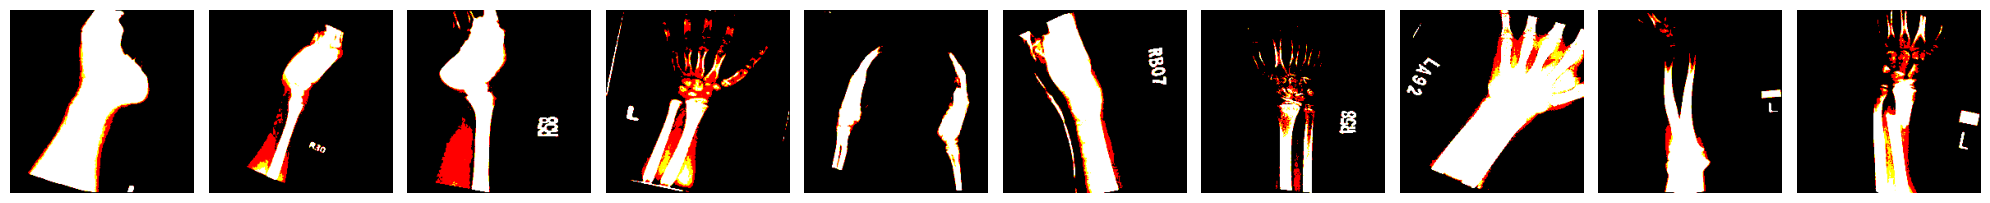

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [43]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])
model.summary()

In [59]:
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [60]:
model.fit(train_batches, epochs=10, validation_data=valid_batches, verbose=2)

Epoch 1/10
100/100 - 125s - loss: 0.6413 - accuracy: 0.6330 - val_loss: 0.6860 - val_accuracy: 0.6100 - 125s/epoch - 1s/step
Epoch 2/10
100/100 - 69s - loss: 0.4514 - accuracy: 0.8130 - val_loss: 0.6171 - val_accuracy: 0.6800 - 69s/epoch - 691ms/step
Epoch 3/10
100/100 - 70s - loss: 0.2220 - accuracy: 0.9090 - val_loss: 1.2204 - val_accuracy: 0.7400 - 70s/epoch - 697ms/step
Epoch 4/10
100/100 - 69s - loss: 0.1229 - accuracy: 0.9580 - val_loss: 1.1479 - val_accuracy: 0.7200 - 69s/epoch - 694ms/step
Epoch 5/10
100/100 - 69s - loss: 0.0558 - accuracy: 0.9820 - val_loss: 1.3747 - val_accuracy: 0.6950 - 69s/epoch - 693ms/step
Epoch 6/10
100/100 - 70s - loss: 0.0519 - accuracy: 0.9850 - val_loss: 1.8350 - val_accuracy: 0.6850 - 70s/epoch - 699ms/step
Epoch 7/10
100/100 - 70s - loss: 0.0316 - accuracy: 0.9900 - val_loss: 2.2149 - val_accuracy: 0.7000 - 70s/epoch - 700ms/step
Epoch 8/10
100/100 - 75s - loss: 0.0195 - accuracy: 0.9950 - val_loss: 2.7053 - val_accuracy: 0.7100 - 75s/epoch - 746m

In [61]:
model.evaluate(train_batches)

100/100 [==============================] - 21s 208ms/step - loss: 0.0189 - accuracy: 0.9910


[0.01894860900938511, 0.9909999966621399]

In [62]:
model.evaluate(valid_batches)

20/20 [==============================] - 4s 187ms/step - loss: 2.1104 - accuracy: 0.6900


[2.110429286956787, 0.6899999976158142]

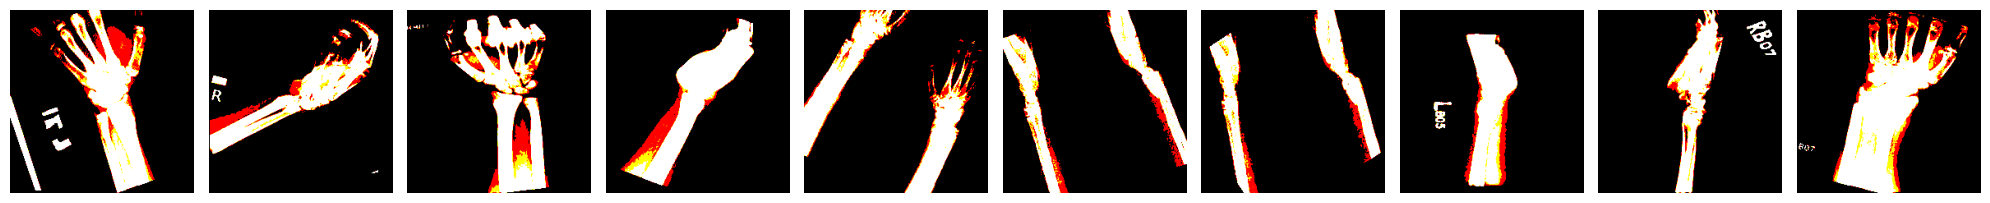

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [63]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [64]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [65]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
np.round(predictions)

In [69]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [74]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation= 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [75]:
test_batches.class_indices

{'fractured': 0, 'notfractured': 1}

Confusion matrix, without normalization
[[32 18]
 [ 9 41]]


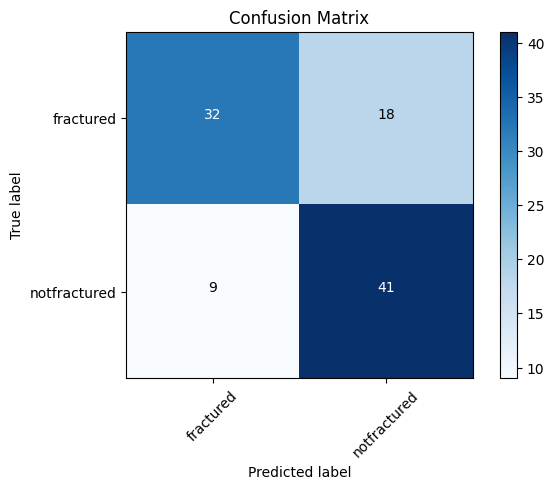

In [76]:
cm_plot_labels = ['fractured', 'notfractured']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')